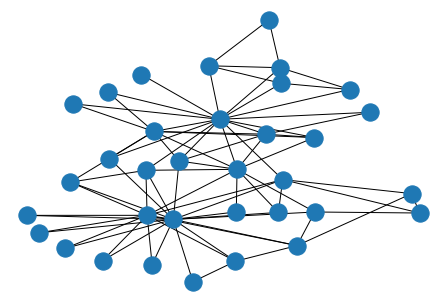

In [92]:
from collections import defaultdict
import Eva
#from Eva import modularity, purity
from cdlib import algorithms, viz, evaluation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
G = nx.karate_club_graph()
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos)

In [13]:
#coms = algorithms.louvain(G)
#viz.plot_network_clusters(G, coms)

In [114]:
algs = [
    algorithms.agdl,
    algorithms.aslpaw,
    algorithms.async_fluid,
    algorithms.belief,
    algorithms.cpm,
    algorithms.chinesewhispers,
    algorithms.der,
    algorithms.edmot,
    algorithms.eigenvector,
    algorithms.em,
    algorithms.ga,
    algorithms.gdmp2,
    algorithms.girvan_newman,
    algorithms.greedy_modularity,
    algorithms.infomap,
    algorithms.label_propagation,
    algorithms.leiden,
    algorithms.louvain,
    algorithms.markov_clustering,
    algorithms.rber_pots,
    algorithms.rb_pots,
    algorithms.scan,
    algorithms.significance_communities,
    algorithms.spinglass,
    algorithms.surprise_communities,
    algorithms.walktrap,
    algorithms.sbm_dl,
    algorithms.sbm_dl_nested
]
plot = viz.plot_network_clusters
pass

0.41978961209730437


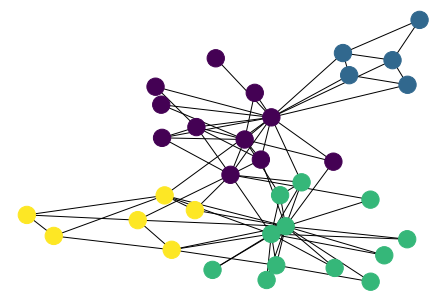

In [85]:
import community as community_louvain
partition = community_louvain.best_partition(G, random_state=1)
print(modularity(partition, G))
#print(evaluation.purity(partition))
nx.draw(G, pos, node_color=list(partition.values()))

0.41978961209730437


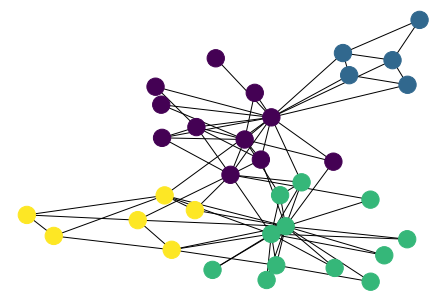

In [86]:
from Eva import eva_best_partition
partition, com_labels = eva_best_partition(G, random_state=1)
print(modularity(partition, G))
nx.draw(G, pos, node_color=list(partition.values()))

0.36752136752136755


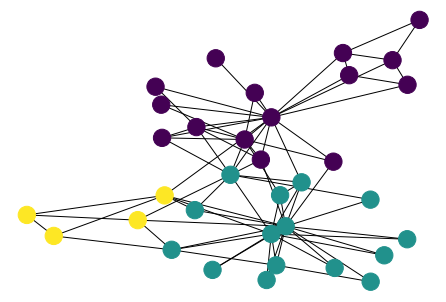

In [87]:
import markov_clustering as mc
matrix = nx.to_scipy_sparse_matrix(G)
result =  mc.run_mcl(matrix, pruning_threshold=0.1)
clusters = mc.get_clusters(result)
cluster_map = {node: i for i, cluster in enumerate(clusters) for node in cluster}
partition = {i: cluster_map[i] for i in range(len(G.nodes()))}
print(modularity(partition, G))
nx.draw(G, pos, node_color=list(partition.values()))

0.37278106508875736


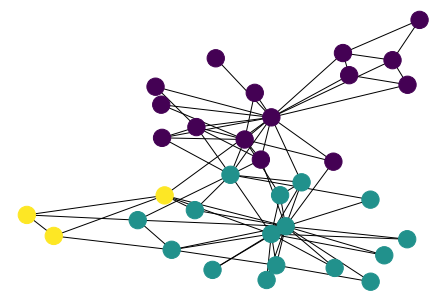

In [88]:
import markov_clustering as mc
matrix = nx.to_scipy_sparse_matrix(G)
result =  mc.run_mcl(matrix, inflation=2.5)
clusters = mc.get_clusters(result)
cluster_map = {node: i for i, cluster in enumerate(clusters) for node in cluster}
partition = {i: cluster_map[i] for i in range(len(G.nodes()))}
print(modularity(partition, G))
nx.draw(G, pos, node_color=list(partition.values()))

0.3744247205785668


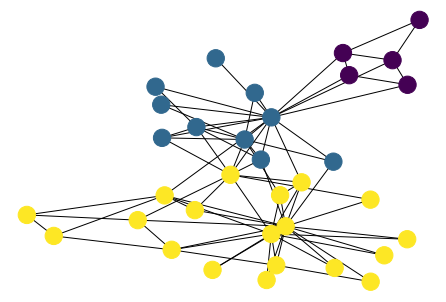

In [89]:
from chinese_whispers import chinese_whispers
chinese_whispers(G, seed=1)
partition = nx.get_node_attributes(G, 'label')
print(modularity(partition, G))
nx.draw(G, pos, node_color=list(partition.values()))

0.4197896120973044


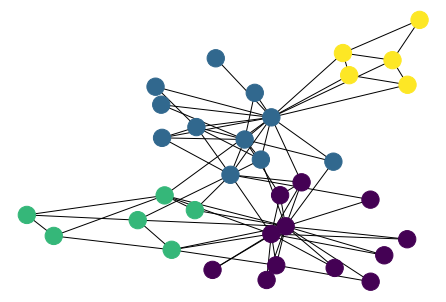

In [90]:
import igraph as ig
import leidenalg
g = ig.Graph.Famous('Zachary')
clusters = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
cluster_map = {node: i for i, cluster in enumerate(clusters) for node in cluster}
partition = {i: cluster_map[i] for i in range(len(G.nodes()))}
print(modularity(partition, G))
nx.draw(G, pos, node_color=list(partition.values()))

In [91]:
'''
import community as community_louvain
from collections import defaultdict
partition = community_louvain.best_partition(G, random_state=1)
coms = defaultdict(list)
for i, com in partition.items():
    coms[com].append(i)
print(coms)
'''

'\nimport community as community_louvain\nfrom collections import defaultdict\npartition = community_louvain.best_partition(G, random_state=1)\ncoms = defaultdict(list)\nfor i, com in partition.items():\n    coms[com].append(i)\nprint(coms)\n'

In [71]:
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity
G = nx.karate_club_graph()
comm_dict = partition(G)

In [72]:
modularity1 = community.modularity(comm_dict, G)
modularity2 = Eva.modularity(comm_dict, G)
modularity3 = get_modularity(G, comm_dict)
print(modularity1, modularity2, modularity3)

Calculating modularity for undirected graph
0.4188034188034188 0.4188034188034188 0.41880341880341887


In [96]:
import networkx as nx
import numpy as np
from modularitydensity.metrics import modularity_density
from modularitydensity.fine_tuned_modularity_density import fine_tuned_clustering_qds

G = nx.karate_club_graph() #sample dataset
adj = nx.to_scipy_sparse_matrix(G) #convert to sparse matrix

community_array = fine_tuned_clustering_qds(G)
print(community_array)

computed_metric = modularity_density(adj, community_array, np.unique(community_array))
print(computed_metric)

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

In [105]:
from cdlib import algorithms, evaluation
import networkx as nx
G = nx.karate_club_graph()
coms1 = algorithms.leiden(G).to_node_community_map()
coms2 = algorithms.louvain(G).to_node_community_map()
partition1 = {i: coms1[i][0] for i in range(len(coms1))}
partition2 = {i: coms2[i][0] for i in range(len(coms2))}
print(community.modularity(partition1, G), community.modularity(partition2, G))

0.4197896120973044 0.4155982905982906
